In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [7]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [8]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [9]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
df.shape

(494021, 43)

In [11]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [12]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [13]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

In [16]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

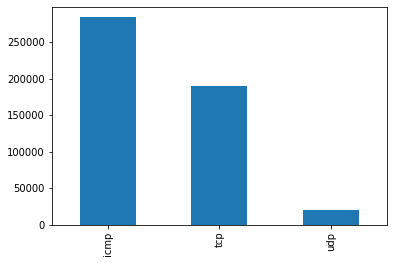

In [17]:
bar_graph('protocol_type')

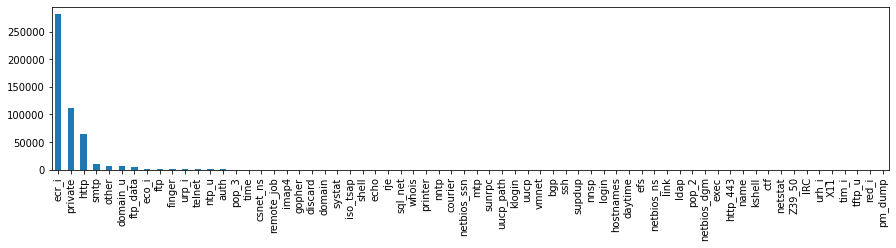

In [18]:
plt.figure(figsize=(15,3))
bar_graph('service')

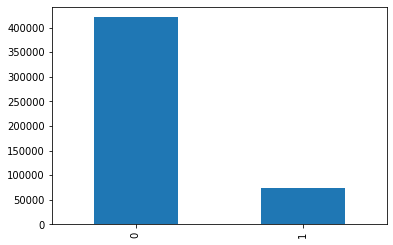

In [19]:
bar_graph('logged_in')

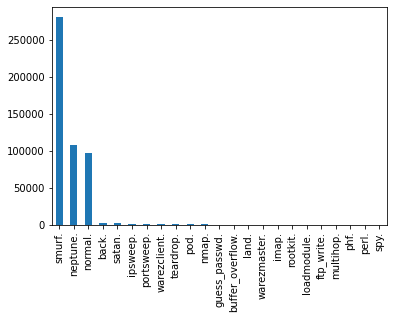

In [20]:
bar_graph('target')

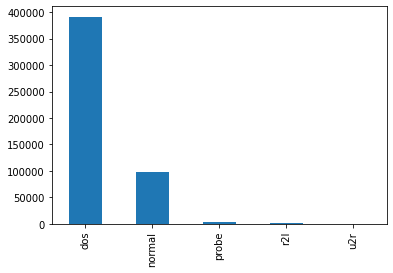

In [21]:
bar_graph('Attack Type')

In [22]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

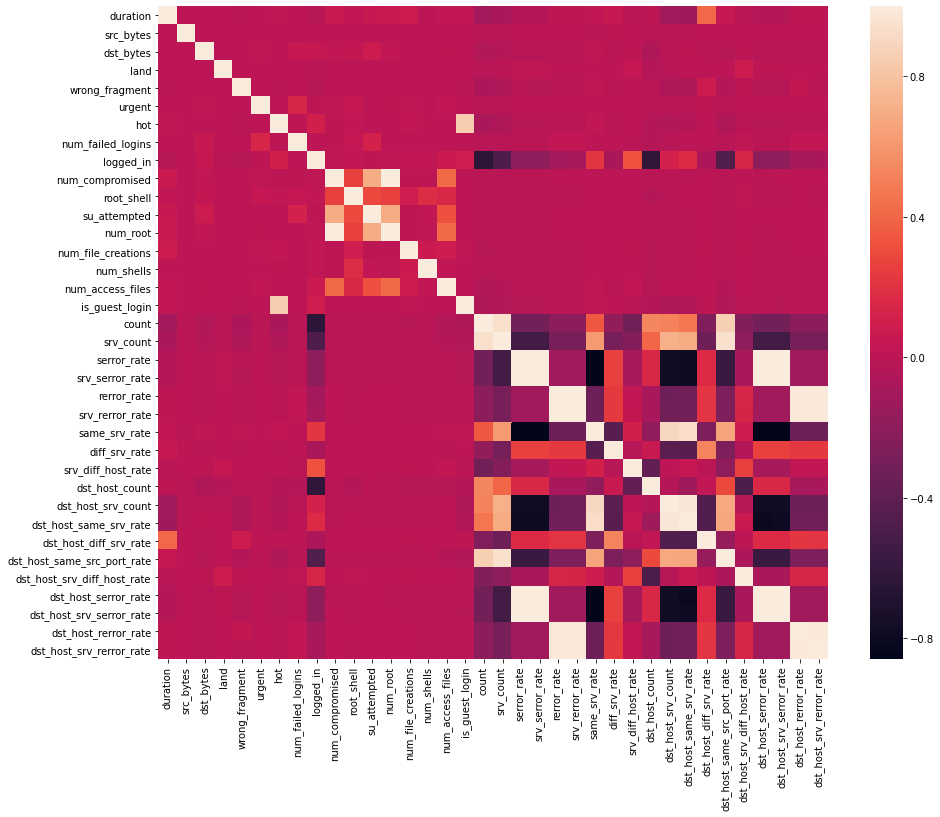

In [23]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [24]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
dst_host_srv_rerror_rate            0.230140
dst_host_rerror_rate                0.230590
rerror_rate                         0.231623
srv_rerror_rate                     0.232147
logged_in                           0.355345
dst_host_serror_rate                0.380593
serror_rate                         0.380717
dst_host_srv_serror_rate            0.380919
srv_serror

In [25]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [26]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [27]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [28]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [29]:
df.drop('service',axis = 1,inplace= True)

In [30]:
df.shape

(494021, 40)

df.head

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [32]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 39)
(330994, 38) (163027, 38)
(330994, 1) (163027, 1)


In [33]:
#KNearestNeighbor starts here
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

#start_time = time.time()
#knn.fit(X_train, Y_train.values.ravel())
#end_time = time.time()
#print("Training time: ",end_time-start_time)

In [34]:
#KNN testing time
#start_time = time.time()
#Y_test_pred1 = knn.predict(X_test)
#end_time = time.time()
#print("Testing time: ",end_time-start_time)

In [35]:
#KNN Training time
#print("Train score is:", knn.score(X_train, Y_train))
#print("Test score is:",knn.score(X_test,Y_test))

In [36]:
df.shape

(494021, 39)

In [37]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [38]:
x=df.iloc[:,0:38]
y=df.iloc[:,[-1]]

In [39]:
x.head

<bound method NDFrame.head of         duration  protocol_type  flag  src_bytes  dst_bytes  land  \
0              0              1     0        181       5450     0   
1              0              1     0        239        486     0   
2              0              1     0        235       1337     0   
3              0              1     0        219       1337     0   
4              0              1     0        217       2032     0   
...          ...            ...   ...        ...        ...   ...   
494016         0              1     0        310       1881     0   
494017         0              1     0        282       2286     0   
494018         0              1     0        203       1200     0   
494019         0              1     0        291       1200     0   
494020         0              1     0        219       1234     0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  dst_host_count  \
0                    0       0    0                  0  ...   

In [40]:
y.head

<bound method NDFrame.head of        Attack Type
0           normal
1           normal
2           normal
3           normal
4           normal
...            ...
494016      normal
494017      normal
494018      normal
494019      normal
494020      normal

[494021 rows x 1 columns]>

In [41]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=13)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
#SupportVectorMachine starts here
clf=svm.SVC()

In [45]:
clf.fit(x_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
pred_clf=clf.predict(x_test)

In [47]:
sklearn.metrics.accuracy_score(y_test, pred_clf)

0.9991194777592227

In [48]:
print(sklearn.metrics.classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78439
      normal       1.00      1.00      1.00     19260
       probe       1.00      0.98      0.99       872
         r2l       0.93      0.91      0.92       223
         u2r       1.00      0.27      0.43        11

    accuracy                           1.00     98805
   macro avg       0.98      0.83      0.87     98805
weighted avg       1.00      1.00      1.00     98805



In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
pred_knn=knn.predict(x_test)

In [51]:
sklearn.metrics.accuracy_score(y_test, pred_knn)

0.9993927432822226

In [74]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [75]:
start_time = time.time()
NB.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.490447998046875


In [76]:
start_time = time.time()
Y_test_pred_NB = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.3398444652557373


In [77]:
print("Train score is:", NB.score(X_train, Y_train))
print("Test score is:",NB.score(X_test,Y_test))

Train score is: 0.8793573297401162
Test score is: 0.8791672545038552


In [78]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_NB))

              precision    recall  f1-score   support

         dos       0.98      0.94      0.96    129106
      normal       0.97      0.64      0.77     32167
       probe       0.09      0.99      0.17      1348
         r2l       0.29      0.39      0.33       387
         u2r       0.01      0.74      0.01        19

    accuracy                           0.88    163027
   macro avg       0.47      0.74      0.45    163027
weighted avg       0.97      0.88      0.91    163027



In [93]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [94]:
start_time = time.time()
DT.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  1.0689737796783447


In [95]:
start_time = time.time()
Y_test_pred_DT = DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.025023460388183594


In [100]:
print("Train score is:", DT.score(X_train, Y_train))
print("Test score is:",DT.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_DT))

Train score is: 0.9905255080152511
Test score is: 0.990437166849663


C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      0.98      0.98     32167
       probe       0.55      0.90      0.68      1348
         r2l       0.00      0.00      0.00       387
         u2r       0.00      0.00      0.00        19

    accuracy                           0.99    163027
   macro avg       0.51      0.57      0.53    163027
weighted avg       0.99      0.99      0.99    163027



In [89]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30)

In [90]:
start_time = time.time()
RF.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  7.280651092529297


In [91]:
start_time = time.time()
Y_test_pred_RF = RF.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.3771064281463623


In [92]:
print("Train score is:", RF.score(X_train, Y_train))
print("Test score is:",RF.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_RF))

Train score is: 0.9999728091747887
Test score is: 0.9996994362896944
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       1.00      0.99      0.99      1348
         r2l       0.99      0.96      0.97       387
         u2r       0.92      0.58      0.71        19

    accuracy                           1.00    163027
   macro avg       0.98      0.90      0.94    163027
weighted avg       1.00      1.00      1.00    163027



In [108]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1200000)

In [109]:
start_time = time.time()
LR.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time:  11.720659494400024


In [113]:
start_time = time.time()
Y_test_pred_LR = LR.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.023018836975097656


In [114]:
print("Train score is:", LR.score(X_train, Y_train))
print("Test score is:",LR.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_LR))

Train score is: 0.9940844849151345
Test score is: 0.9941788783453047
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      1.00      0.99     32167
       probe       0.97      0.90      0.94      1348
         r2l       0.84      0.82      0.83       387
         u2r       1.00      0.26      0.42        19

    accuracy                           0.99    163027
   macro avg       0.96      0.80      0.83    163027
weighted avg       0.99      0.99      0.99    163027



In [117]:
#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)

In [118]:
start_time = time.time()
GBC.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

Training time:  339.88706278800964


In [119]:
start_time = time.time()
Y_test_pred_GBC = GBC.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.9808917045593262


In [121]:
print("Train score is:", GBC.score(X_train, Y_train))
print("Test score is:", GBC.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_GBC))

Train score is: 0.9855072901623594
Test score is: 0.9854502628398977
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      0.95      0.97     32167
       probe       0.99      0.64      0.78      1348
         r2l       0.12      0.78      0.21       387
         u2r       0.37      0.53      0.43        19

    accuracy                           0.99    163027
   macro avg       0.70      0.78      0.68    163027
weighted avg       1.00      0.99      0.99    163027



In [122]:
#Keras Classifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [127]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(38,input_dim =38,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [128]:
KC = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [129]:
start = time.time()
KC.fit(X_train, Y_train.values.ravel())
end = time.time()


Epoch 1/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.4194 - accuracy: 0.9461
Epoch 2/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0851 - accuracy: 0.9843
Epoch 3/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0702 - accuracy: 0.9846
Epoch 4/100
330994/330994 [==============================] - 3s 8us/step - loss: 0.0673 - accuracy: 0.9847
Epoch 5/100
330994/330994 [==============================] - 3s 8us/step - loss: 0.0657 - accuracy: 0.9847
Epoch 6/100
330994/330994 [==============================] - 3s 8us/step - loss: 0.0646 - accuracy: 0.9847
Epoch 7/100
330994/330994 [==============================] - 3s 8us/step - loss: 0.0637 - accuracy: 0.9847
Epoch 8/100
330994/330994 [==============================] - 3s 8us/step - loss: 0.0630 - accuracy: 0.9848
Epoch 9/100
330994/330994 [==============================] - 3s 8us/step - loss: 0.0562 - accuracy: 0.9858
Epoch 10/100
330994/330994 [========

In [130]:
print('Training time')
print((end-start))

Training time
289.36312222480774


In [132]:
start_time = time.time()
Y_test_pred_KC = KC.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.45141053199768066


In [136]:
start_time = time.time()
Y_train_pred_KC = KC.predict(X_train)
end_time = time.time()
print(accuracy_score(Y_train,Y_train_pred_KC))
print(accuracy_score(Y_test,Y_test_pred_KC))

0.9991540632156474
0.9989020223643936


In [138]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_KC))

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       0.99      0.97      0.98      1348
         r2l       0.86      0.82      0.84       387
         u2r       0.00      0.00      0.00        19

    accuracy                           1.00    163027
   macro avg       0.77      0.76      0.76    163027
weighted avg       1.00      1.00      1.00    163027

